In [14]:
# import sys
import numpy as np
import matplotlib.pyplot as plt
import general_functions as gf
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D

Number of processors: 1, 2, 4, 8, 16, 32, 64, 128

In [15]:
number_of_processors = np.arange(3, 65)
number_of_processors = np.hstack((number_of_processors, 128))
number_of_processors -= 2  # 2 ranks are reserved for client and scheduler
number_of_processors

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62, 126])

In [44]:
# Number of processors to the right
time_futures = np.array([43.73510432243347, 27.69628930091858, 21.294326543807983, 24.742773294448853, 
                         24.52776575088501, 21.494829893112183, 23.83391547203064, 22.749369382858276,
                         22.306143760681152, 22.523696899414062, 21.474926948547363, 22.05644154548645,
                         22.514554023742676, 23.677794218063354, 22.287954568862915, 23.417566776275635,
                         21.726898670196533, 24.040193557739258, 23.75094699859619, 21.98479437828064,
                         23.630366563796997, 22.816807746887207, 22.11270761489868, 25.6753408908844,
                         25.589523792266846, 23.30293345451355, 22.556342363357544, 22.486435413360596,
                         22.787416696548462, 21.2719669342041, 23.12664484977722, 22.71413779258728,
                         24.819189071655273, 22.641006469726562, 22.389920711517334, 22.955384254455566,
                         25.288076162338257, 22.810896158218384, 23.00199794769287, 23.646586656570435,
                         25.399255514144897, 23.44575262069702, 22.645368099212646, 23.428226232528687,
                         23.68304443359375, 23.25575304031372, 20.783602714538574, 23.280413150787354,
                         23.31285047531128, 22.97198486328125, 25.344891786575317, 26.724313974380493,
                         23.75083327293396, 22.923129320144653, 23.33027410507202, 23.47719144821167,
                         23.02740454673767, 23.51486325263977, 23.458642959594727, 23.72999382019043,
                         23.862566232681274, 24.085575580596924])

time_futures_128_processes = np.array([24.055941104888916])

time_futures = np.hstack((time_futures, time_futures_128_processes)).flatten()


# -- DASK ARRAYS --
# Chunk size 10
time_array_cs10 = np.array([51.88572311401367, 31.52690029144287, 25.520707368850708, 22.315322160720825,
                           21.27044701576233, 20.52687382698059, 19.204825401306152, 18.123905181884766,
                           18.35434865951538, 17.361020803451538, 17.37568712234497, 17.125612258911133,
                           16.779451847076416, 16.95413613319397, 16.953415870666504, 16.45382833480835,
                           16.305959939956665, 16.293809413909912, 16.455384254455566, 16.617598056793213,
                           16.580504417419434, 16.23032236099243, 16.272701263427734, 16.141331434249878,
                           16.599165439605713, 16.306763887405396, 16.47279930114746, 15.941596746444702,
                           16.352519035339355, 16.134887218475342, 15.7562255859375, 16.748724460601807,
                           16.60653781890869, 16.729788541793823, 16.62843370437622, 16.590811491012573,
                           16.90154194831848, 16.39762568473816, 17.001858949661255, 17.086578845977783,
                           16.853654861450195, 17.231180906295776, 16.512427806854248, 16.363528966903687,
                           16.665123462677002, 17.152377367019653, 17.644070386886597, 17.2714946269989,
                           17.647153615951538, 17.183321237564087, 17.298611402511597, 16.9710054397583,
                           17.16150712966919, 16.848748683929443, 17.476338386535645, 17.729346752166748,
                           17.61646008491516, 17.345781803131104, 17.952659845352173, 17.90303683280945,
                           18.24486231803894, 17.632941722869873])

time_array_cs10_128_processes = np.array([18.716140747070312])

time_array_cs10 = np.hstack((time_array_cs10, time_array_cs10_128_processes)).flatten()

# 20
time_array_cs20 = np.array([36.05090832710266, 21.851062297821045, 17.511462450027466, 15.445767402648926,
                           14.336842775344849, 14.090959072113037, 11.986111164093018, 11.10579252243042,
                           10.520482540130615, 10.458972692489624, 10.01957893371582, 9.938783168792725,
                           9.622879028320312, 9.621237516403198, 9.253223657608032, 9.297342300415039,
                           9.202801942825317, 9.187374591827393, 9.106514930725098, 9.094176292419434,
                           8.858351469039917, 8.627035856246948, 8.993272542953491, 8.946177244186401,
                           8.938302278518677, 8.55049467086792, 8.775084495544434, 8.880670547485352,
                           8.793187856674194, 8.490362882614136, 8.473982095718384, 8.40412425994873,
                           8.834028720855713, 8.982466220855713, 8.918596506118774, 8.784347534179688,
                           8.949964046478271, 9.015788555145264, 8.988112449645996, 8.875222206115723,
                           9.130862951278687, 9.093175649642944, 9.076669931411743, 9.051336526870728,
                           9.26532793045044, 9.447291612625122, 9.254473686218262, 9.027875185012817,
                           9.389918565750122, 9.577275276184082, 9.100593090057373, 9.48296570777893,
                           9.436628103256226, 9.480603218078613, 9.517555952072144, 8.923496961593628,
                           9.431381464004517, 9.774820327758789, 9.796088218688965, 9.813323974609375, 
                           9.505717992782593, 9.755266904830933])

time_array_cs20_128_processes = np.array([10.961933851242065])

time_array_cs20 = np.hstack((time_array_cs20, time_array_cs20_128_processes)).flatten()

# 100
time_array_cs100 = np.array([22.99638295173645, 14.253631591796875, 11.545852184295654, 10.57416558265686,
                            10.324481010437012, 10.432960510253906, 7.880094051361084, 6.753062725067139,
                            6.467398405075073, 6.193495750427246, 5.7380523681640625, 5.710931062698364,
                            5.76612401008606, 5.992748975753784, 5.291162729263306, 4.773895978927612,
                            4.715694427490234, 4.568300724029541, 4.417381286621094, 4.387386322021484,
                            4.5195629596710205, 4.5794055461883545, 4.137386322021484, 4.081733465194702,
                            3.8558552265167236, 4.1190032958984375, 3.8758366107940674, 3.9295456409454346,
                            3.98472261428833, 3.916316509246826, 3.8198468685150146, 3.7318906784057617,
                            4.784128904342651, 4.552032232284546, 4.4568421840667725, 4.721015930175781,
                            4.255892753601074, 4.435788154602051, 4.635670185089111, 4.775006055831909,
                            4.668745994567871, 4.576540231704712, 4.365117788314819, 4.447401523590088,
                            4.556252956390381, 4.408235788345337, 4.478000640869141, 4.494969129562378,
                            4.404510974884033, 4.557278871536255, 4.529965877532959, 4.854824781417847,
                            4.359338283538818, 4.753688097000122, 4.329038381576538, 4.364322900772095,
                            4.338327169418335, 4.632336139678955, 4.438475131988525, 4.663093328475952,
                            4.702141284942627, 4.59902811050415])


time_array_cs100_128_processes = np.array([4.900163173675537])

time_array_cs100 = np.hstack((time_array_cs100, time_array_cs100_128_processes)).flatten()


Get mean, std and relative speedup of data

In [45]:
def error_prop_speedup(t_N_vals, t1, std_t_N_vals, std_t1):
    term1 = std_t1 / t_N_vals
    term2  = -0.5 * t1 / (t_N_vals ** 2) * std_t_N_vals
    std_total = np.sqrt(term1 ** 2 + term2 ** 2)
    return std_total


def abs_rel_speedup_and_efficiecy(data_all, N_processor, weak_scaling=False):
    # Absolute
    abs_speed_mean = np.mean(data_all, axis=0)
    abs_speed_std = np.std(data_all, axis=0) / np.sqrt((len(abs_speed_mean)-1))  # Bessel's correction
    
    # Relative speedup
    # Divide all data points by the ngangs=1 points.
    t1_vals = data_all[:, 0][:, None]
    std_t1_vals = abs_speed_std[0]
    
    rel_speed_data = t1_vals / data_all  # np.divide(data_all.T, data_all[:, 0]).T
    rel_speed_mean = np.mean(rel_speed_data, axis=0)
    rel_speed_std_all = error_prop_speedup(data_all, t1_vals, abs_speed_std, std_t1_vals)
    rel_speed_std = np.mean(rel_speed_std_all, axis=0)
    if weak_scaling:
         rel_speed_mean *= N_processor
         rel_speed_std *= N_processor
    
    # Efficiency
    efficiency_data = t1_vals / (data_all * N_processor)
    efficiency_mean = np.mean(efficiency_data, axis=0)
    efficiency_std = np.std(efficiency_data, axis=0) / np.sqrt(len(efficiency_data) - 1)
    
    return abs_speed_mean, abs_speed_std, rel_speed_mean, rel_speed_std, efficiency_mean, efficiency_std


def abs_rel_speedup_and_efficiecy_no_std(data_all, N_processor, weak_scaling=False):
    # Absolute
    abs_speed = data_all
    
    # Relative speedup
    # Divide all data points by the ngangs=1 points.
    t1_vals = data_all[0]
    
    rel_speed = t1_vals / data_all  # np.divide(data_all.T, data_all[:, 0]).T
    if weak_scaling:
         rel_speed *= N_processor
    
    # Efficiency
    efficiency = t1_vals / (data_all * N_processor)
    
    return abs_speed, rel_speed, efficiency

# Plot

#### Fitting

In [46]:
def amdahl_law_theoretical(N_processor, parallel_fraction):
    """Amdahl's law given the number of processors and the fraction of the program that is parallel."""
    S_latency = 1 / ((1 - parallel_fraction) + parallel_fraction / N_processor)
    return S_latency


def gustafs_law_theoretical(N_processor, parallel_fraction):
    speedup = 1 + (N_processor - 1) * parallel_fraction
    return speedup


def fit_scaling(f_fit, N_processor, time, std_time=None, p0=(0.5,)):
    """_summary_

    Args:
        f_fit (func): Ahmdahls for strong, Gustafs for weak
        time (1darray): Relative time scaling
        std_time (1darray): uncertainty on relative time scaling
        p0 (tupple): Initial guess on parameters

    Returns:
        (par, err, x_fit, y_fit): Fit par, fit err, x values for fit, y values for fit. Last two intended for plotting
    """
    par, cov = curve_fit(f_fit, N_processor, time, sigma=std_time, p0=p0)
    err = np.sqrt(np.diag(cov))
    x_fit = np.linspace(N_processor.min(), N_processor.max(), 300)
    y_fit = f_fit(x_fit, *par)
    return par[0], err[0], x_fit, y_fit

### Plot the strong and week scaling together with fits

In [109]:
def plot_strong_scaling(time_data_sets, N_processor, labels=[]):
    # Check if has points for uncertainties
    has_uncertainties = True
    
    if time_data_sets[0].ndim == 1:
        has_uncertainties = False
    
    if len(labels) == 0:
        labels = [""] * len(time_data_sets)
    
    # Plot setup
    fig, ax = plt.subplots(nrows=3)

    # All axis setup
    xticks = np.arange(N_processor[0], N_processor[-1], 5)
    for axis in ax:
        axis.grid()    
        axis.set_xticks(ticks=xticks, labels=xticks, fontsize=6)
        axis.spines[:].set_visible(False)

    # Absolute setup
    ax[0].set(ylabel="Time [s]")
    # Relative setup
    #yticks_rel = np.round(np.linspace(N_processor.min(), N_processor.max(), 10), 1)
    ylim_rel = (0, N_processor.max())
    ax[1].set(ylabel="Speedup",)# ylim=ylim_rel)
    # ax[1].set_yticks(ticks=yticks_rel, labels=yticks_rel, fontsize=6)
    # Efficiency setup
    ax[2].set(ylabel="Efficiency", xlabel="Number of workers")
    # ax[2].set_xticks(ticks=xticks, labels=xticks, fontsize=6)
    
    # Plot ideal lines
    #ax[1].plot(N_processor, N_processor, ls="-", color="grey", lw=2)  # Relative scaling ideal 
    #ax[2].axhline(1, ls="-", color="grey", lw=2)  # Efficiency ideal 

    # Loop over each time data set and plot it
    for time_data, label in zip(time_data_sets, labels):
        # Get data
        if has_uncertainties:
            abs_speed_mean, abs_speed_std, rel_speed_mean, rel_speed_std, efficiency_mean, efficiency_std = abs_rel_speedup_and_efficiecy(time_data, N_processor, weak_scaling=False)        
            # Plot - Abs, rel, efficiency
            ax[0].errorbar(N_processor, abs_speed_mean, yerr=abs_speed_std, fmt=".--", label=label)  # Absolute scaling
            
            ax[1].errorbar(N_processor, rel_speed_mean, yerr=rel_speed_std, fmt=".--", label=label)  # Relative scaling
        
            ax[2].errorbar(N_processor, efficiency_mean, yerr=efficiency_std, fmt=".--", label=label)  # Efficiency scaling
        
            # Fit and print results
            par, err, x_fit, y_fit = fit_scaling(amdahl_law_theoretical, N_processor, rel_speed_mean, rel_speed_std, p0=(0.20,))
            
        else: # No uncertainties
            abs_speed, rel_speed, efficiency = abs_rel_speedup_and_efficiecy_no_std(time_data, N_processor, weak_scaling=False)
            # Plot - Abs, rel, efficiency
            ax[0].plot(N_processor, abs_speed, ".", markersize=3, label=label)  # Absolute scaling
            
            ax[1].plot(N_processor, rel_speed, ".", markersize=3, label=label)  # Relative scaling
        
            ax[2].plot(N_processor, efficiency, ".", markersize=3, label=label)  # Efficiency scaling
        
            # Fit and print results
            par, err, x_fit, y_fit = fit_scaling(amdahl_law_theoretical, N_processor, rel_speed, p0=(0.20,))
            
        
        print(f"{label} - Parallelization frac = {par:.4f} +- {err:.4f}")
        
    
    # Only show a single fit
    ax[1].plot(x_fit, y_fit, ls="-", c="deepskyblue", label=label+" Fit")  # Rel scaling fit
    
    # Legend
    # Labels lines
    custom_lines = []
    colors = ["rebeccapurple", "firebrick", "black", "darkorange"]
    for label, c in zip(labels, colors):
        line = Line2D([0], [0], color=c, ls="none", marker=".")
        custom_lines.append(line)
    
    line_fit = Line2D([0], [0], color="deepskyblue", ls="-")
    line_ideal = Line2D([0], [0], color="grey", ls="-", lw=2)
    custom_lines.append(line_fit)
    #custom_lines.append(line_ideal)
    
    
    # Fit and ideal lines
    labels = labels + ["Fit"] #+ ["Ideal"]
    fig.legend(custom_lines, labels, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=len(labels), fontsize=8)
    fig.savefig("strong_scaling.png")
    plt.show()

Futures - Parallelization frac = 0.4906 +- 0.0055
Array, size 10 - Parallelization frac = 0.6989 +- 0.0027
Array, size 20 - Parallelization frac = 0.7706 +- 0.0022
Array, size 100 - Parallelization frac = 0.8300 +- 0.0026


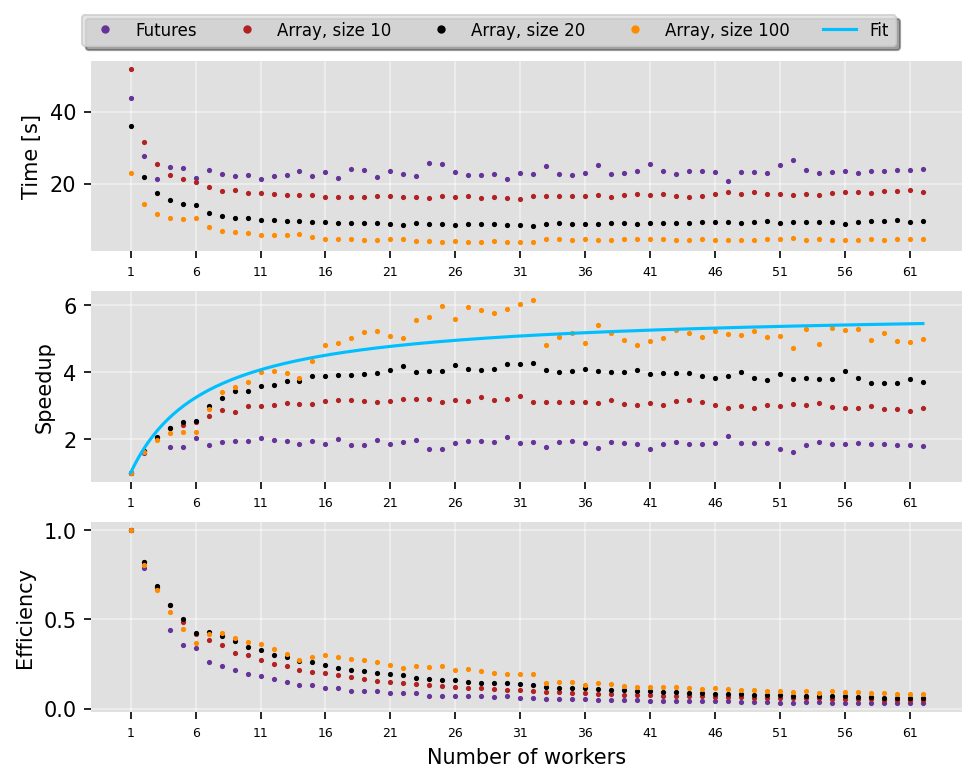

In [110]:
#plot_strong_scaling((time_futures, time_array_cs10, time_array_cs20, time_array_cs100), number_of_processors, labels=["Futures", "Array, size 10", "Array, size 20", "Array, size 100"])
plot_strong_scaling((time_futures[:-1], time_array_cs10[:-1], time_array_cs20[:-1], time_array_cs100[:-1]), number_of_processors[:-1], labels=["Futures", "Array, size 10", "Array, size 20", "Array, size 100"])